# Python Data Science Handbook: Matplotlib

%matplotlib inline will lead to static images of your plot embedded in the
notebook

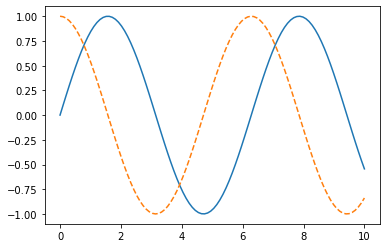

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

Para guardar una imagen:

In [ ]:
fig.savefig('my_figure.png')

Interfaces: Estilo MATLAB u orientada a objetos 

Algunas funciones que difieren entre ellos:
• plt.xlabel() → ax.set_xlabel()
• plt.ylabel() → ax.set_ylabel()
• plt.xlim() → ax.set_xlim()
• plt.ylim() → ax.set_ylim()
• plt.title() → ax.set_title()

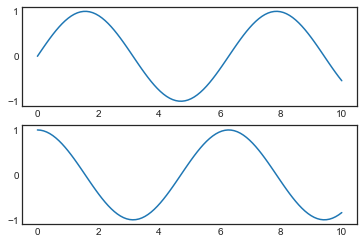

In [ ]:
# Estilo MATLAB

plt.figure() # create a plot figure
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))
# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

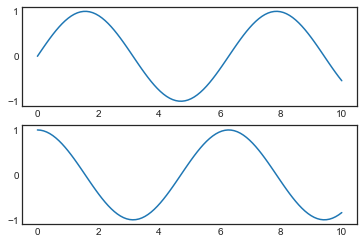

In [ ]:
# orientada a objetos : para situaciones mas complejas donde se requiere mas control

# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)
# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));


### Funciones de una linea 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

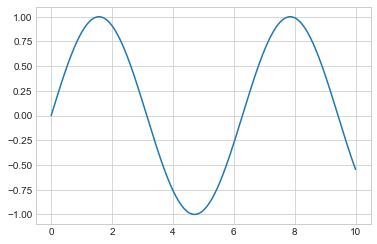

In [ ]:
fig = plt.figure() #figura (mas general) es lo que contiene a los graficos
ax = plt.axes() #los ejes que conforman un grafico
x = np.linspace(0, 10, 1000) #toma 1000 valores de 0 a 10 
ax.plot(x, np.sin(x));

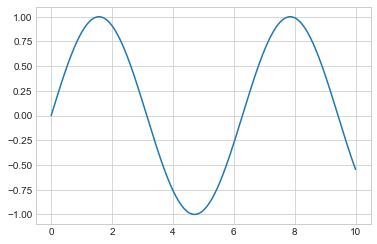

In [ ]:
plt.plot(x, np.sin(x)); # otra opcion

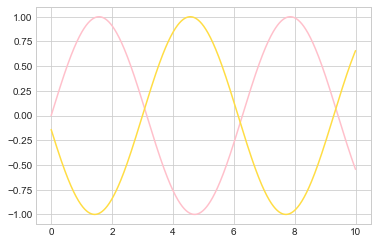

In [ ]:
plt.plot(x, np.sin(x - 0), color='pink')
plt.plot(x, np.sin(x - 3), color='#FFDD44') # Hex code (RRGGBB from 00 to FF)

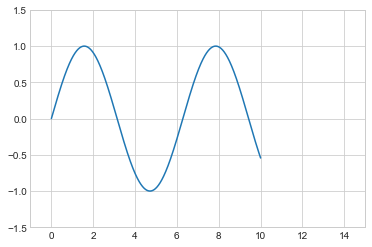

In [ ]:
#Limitar valores x e y
plt.plot(x, np.sin(x))
plt.xlim(-1, 15)
plt.ylim(-1.5, 1.5);

# plt.axis('equal'); hace que una unidad en x sea igual a una en y
# plt.title("A Sine Curve")

Uso de etiquetas:

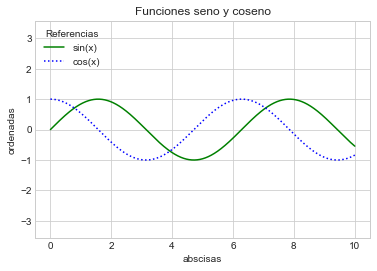

In [ ]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.xlabel('abscisas')
plt.ylabel('ordenadas')
plt.axis('equal')
#plt.legend();
plt.legend(loc='upper left', frameon=False,title='Referencias')
plt.title('Funciones seno y coseno');

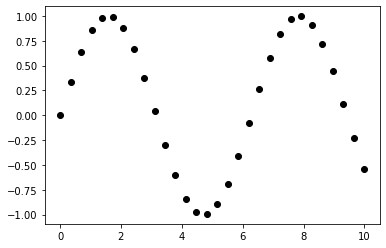

In [ ]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black'); # line (-), circle marker (o), black (k)

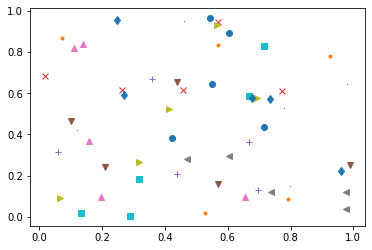

In [ ]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
        label="marker='{0}'".format(marker))

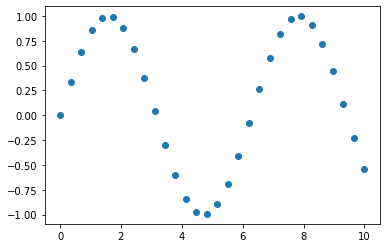

In [ ]:
plt.scatter(x, y, marker='o'); #las propiedades de cada punto individual puede ser controlada
#usando scatter se puede hacer menos eficiente para datasets mas grandes

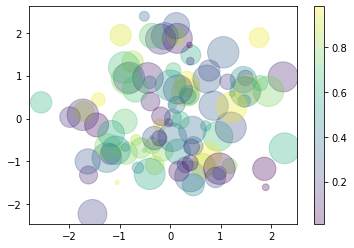

In [ ]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
cmap='viridis')  # alpha mide el nivel de transparencia
plt.colorbar(); # show color scale

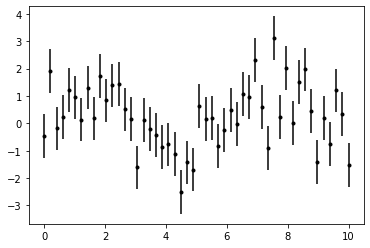

In [ ]:
#GRAFICAR EL ERROR
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.k');

display three-dimensional data in two dimensions using
contours or color-coded regions

#### Histogramas

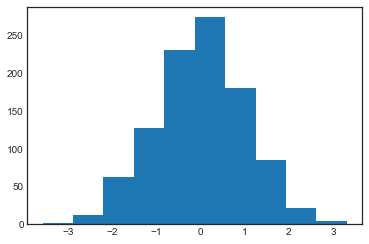

In [ ]:
data = np.random.randn(1000)
plt.style.use('seaborn-white')
plt.hist(data);

[  2  12  63 128 231 274 180  85  21   4]


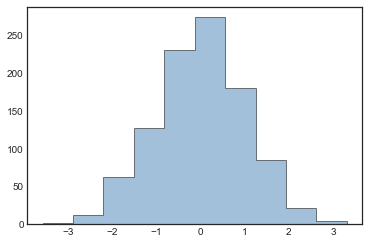

In [ ]:
plt.hist(data, bins=10, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='black');
counts, bin_edges = np.histogram(data, bins=10)
print(counts)

Histogramas de dos dimensiones:

In [ ]:
#esto basicamente crea valores de x e y con una distribucion gausseana 
#"Draw random samples from a multivariate normal distribution."
mean = [0, 0] 
cov = [[1, 1], [1, 2]] #Covariance matrix of the distribution.
x, y = np.random.multivariate_normal(mean, cov, 10000).T 

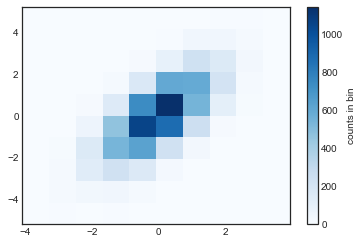

In [ ]:
plt.hist2d(x, y, bins=10, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin') #unidades por intervalo

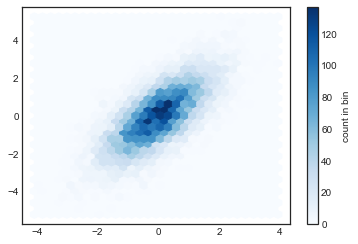

In [ ]:
# puedo hacerlo con hexagonos
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

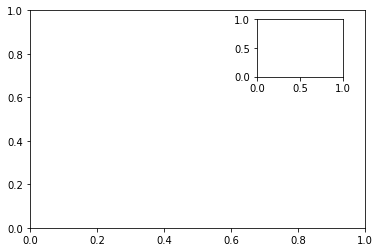

In [ ]:
ax1 = plt.axes() # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

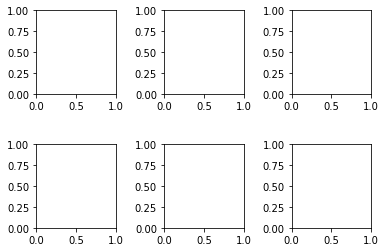

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.6)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i) #define la matriz de 2x3 y va agregando los graficos 
    # ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

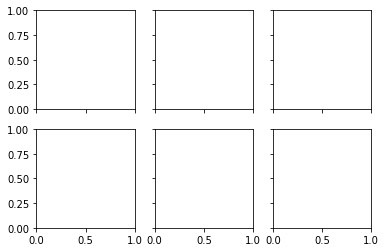

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row') #comparten el eje y y el eje x es igual

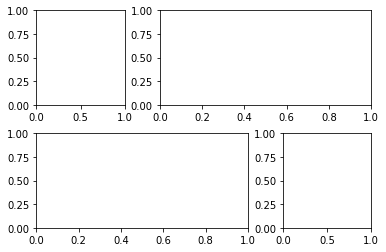

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3) # crea la grilla de dos filas y 3 columnas
plt.subplot(grid[0, 0]) #crea el primer subplot en el espacio 0 0 de la grilla
plt.subplot(grid[0, 1:]) #crea otro subplot en la fila 0 y usa las columnas 1 y 2
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

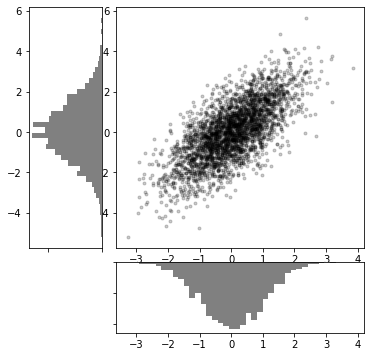

In [ ]:
#Ejemplo del libro: Grafica puntos en el plano y crea dos histogramas para representar los valores mas comunes de x e y 

# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()

Escala Logaritmica

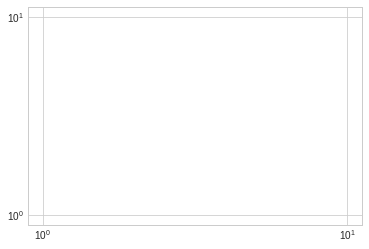

In [9]:
ax = plt.axes(xscale='log', yscale='log')

ejemplo:

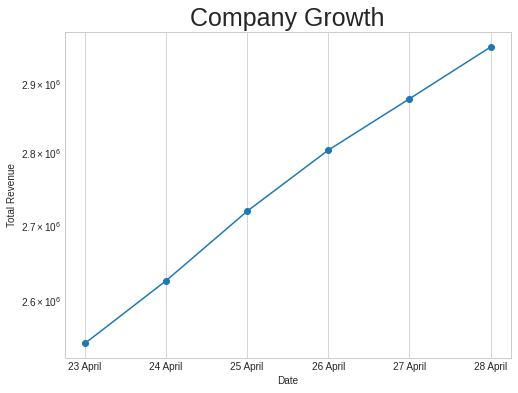

In [8]:
import pandas as pd

date=["28 April",
      "27 April",
      "26 April",
      "25 April",
      "24 April",
      "23 April"]

revenue=[2954222 , 
            2878196 , 
            2804796 , 
            2719896 ,  
            2626321,
            2544792 ]  


company_data_df=pd.DataFrame({"date":date,"total_revenue":revenue}) #crea un dataframe de pandas con las fechas y ganancias
company_data = company_data_df.sort_values(by=['total_revenue']) #los ordena
fig = plt.figure(figsize=(8, 6)) #crea la figura
plt.scatter(company_data['date'],company_data['total_revenue']) #grafico de puntos
plt.plot(company_data['date'],company_data['total_revenue']) #grafico continuo
plt.yscale("log") #Escala logaritmica

plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.title("Company Growth",fontsize=25)
plt.show()

In [ ]:
 plt.MaxNLocator() #specify the maximum number of ticks that will be displayed. 

Formato de ejes

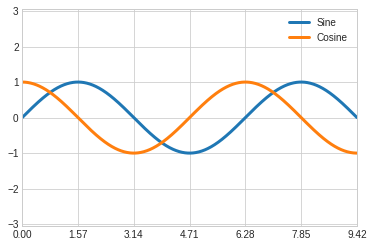

In [18]:
#busco que el eje x represente mejor a la funcion seno/coseno
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000) #1000 valores de x de 0 a 3pi
ax.plot(x, np.sin(x), lw=3, label='Sine') #lw es ancho de linea
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2)) #marca en cada multiplo de pi/2
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))

Si quiero que los numeros se vean como multiplos de pi

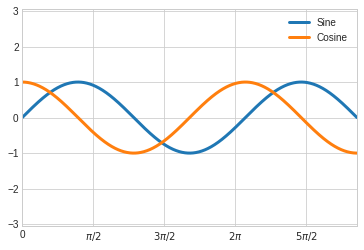

In [16]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);


def format_func(value, tick_number):
  # find number of multiples of pi/2
  N = int(np.round(2 * value / np.pi))
  if N == 0:
    return "0"
  elif N == 1:
    return r"$\pi/2$"
  elif N == 2:
    return r"$\pi$"
  elif N % 2 > 0:
    return r"${0}\pi/2$".format(N)
  else:
    return r"${0}\pi$".format(N // 2)
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))




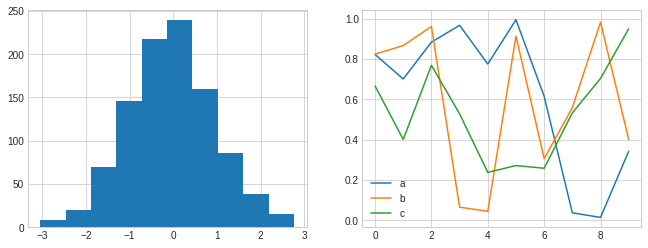

In [20]:
import seaborn

def hist_and_lines():
  np.random.seed(0)
  fig, ax = plt.subplots(1, 2, figsize=(11, 4))
  ax[0].hist(np.random.randn(1000))
  for i in range(3):
    ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

hist_and_lines()